## Análisis Exploratorio de Datos EDA

Se realiza el Análisis Exploratorio de Datos `EDA` para cada dataset generado a partir del `ETL` en cada uno de los casos. 
Una vez analizados, se obtendrá una visión más completa para poder decidir cuales serán las features destinadas a entrenar el modelo de recomendación. 

In [1]:
#Importando librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### EDA de steam_games

1. Extracción de datos

In [7]:
games_1= pd.read_csv('data/steam_6_modelo.csv', encoding='utf8')
games_1.head(2)

,item_id,app_name,title,genres,Año de lanzamiento,publisher,developer,specs,price
0,761140,Lost Summoner Kitty,Lost Summoner Kitty,Action,2018,Kotoshiro,Kotoshiro,['Single-player'],4.99
1,761140,Lost Summoner Kitty,Lost Summoner Kitty,Casual,2018,Kotoshiro,Kotoshiro,['Single-player'],4.99


2. Exploración de datos

In [8]:
#cantidad de columnas y el tipo de datos
games_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74833 entries, 0 to 74832
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_id             74833 non-null  int64 
 1   app_name            74831 non-null  object
 2   title               72783 non-null  object
 3   genres              71551 non-null  object
 4   Año de lanzamiento  74833 non-null  int64 
 5   publisher           59218 non-null  object
 6   developer           71355 non-null  object
 7   specs               73893 non-null  object
 8   price               71487 non-null  object
dtypes: int64(2), object(7)
memory usage: 5.1+ MB


In [9]:
games_1.shape

(74833, 9)

3. Revision Nulos

In [10]:
games_1.isnull().sum()

item_id                   0
app_name                  2
title                  2050
genres                 3282
Año de lanzamiento        0
publisher             15615
developer              3478
specs                   940
price                  3346
dtype: int64

In [11]:
#inicio un archivo con las columnas que tengo que reemplazar nulos
archivo_columnas=["publisher", "app_name","developer","genres",'title']

#genero un dataframe con las columnas y sus nulos reemplazados por "Sin Datos"
nulos= games_1[archivo_columnas].fillna("Sin Datos")

#elimino las colummas a reemplazar y concateno ambos dataframes 
games_2 = pd.concat([games_1.drop(archivo_columnas, axis=1), nulos], axis=1)
games_2.head(2)

,item_id,Año de lanzamiento,specs,price,publisher,app_name,developer,genres,title
0,761140,2018,['Single-player'],4.99,Kotoshiro,Lost Summoner Kitty,Kotoshiro,Action,Lost Summoner Kitty
1,761140,2018,['Single-player'],4.99,Kotoshiro,Lost Summoner Kitty,Kotoshiro,Casual,Lost Summoner Kitty


In [13]:
# se define una función para poder reemplazar los datos string de la columna "price" por flotantes 0.0

def cambio_a_float(valor):

    if pd.isna(valor): #esta parte de la función es para el caso de que no exista ningun string o float en el campo
        return 0.0
    try:
        flotante = float(valor) #si el valor es float lo conservo
        return flotante
    except (ValueError, TypeError): #si el valor es diferente retorno 0.0
        return 0.0
    
#Aplico esta función a la columna precio
games_2["price"] = games_2["price"].apply(cambio_a_float)

In [14]:
games_2.isnull().sum()

item_id                 0
Año de lanzamiento      0
specs                 940
price                   0
publisher               0
app_name                0
developer               0
genres                  0
title                   0
dtype: int64

4.Tratamiento variables

obs: Se modificaran las variables para realizar gráficos sobre los mismos
* **genres** : genero del juego
* **item_id**: identificador único del juego
* **release_anio**: año en que se estreno
* **publisher**: editor del juego
* **app_name**: nombre de la aplicación
* **title**: nombre del juego 
* **developer**: desarrollador

4.1 Genero

In [16]:
#se contabilizan los diferentes generos de juegos Steam
cantidad_generos= games_2["genres"].value_counts()
cantidad_generos.to_frame

<bound method Series.to_frame of Indie                        15858
Action                       11319
Casual                        8282
Adventure                     8242
Strategy                      6957
Simulation                    6699
RPG                           5479
Sin Datos                     3282
Free to Play                  2031
Early Access                  1462
Sports                        1257
Massively Multiplayer         1108
Racing                        1083
Design &amp; Illustration      460
Utilities                      340
Web Publishing                 268
Animation &amp; Modeling       183
Education                      125
Video Production               116
Software Training              105
Audio Production                93
Photo Editing                   77
Accounting                       7
Name: genres, dtype: int64>

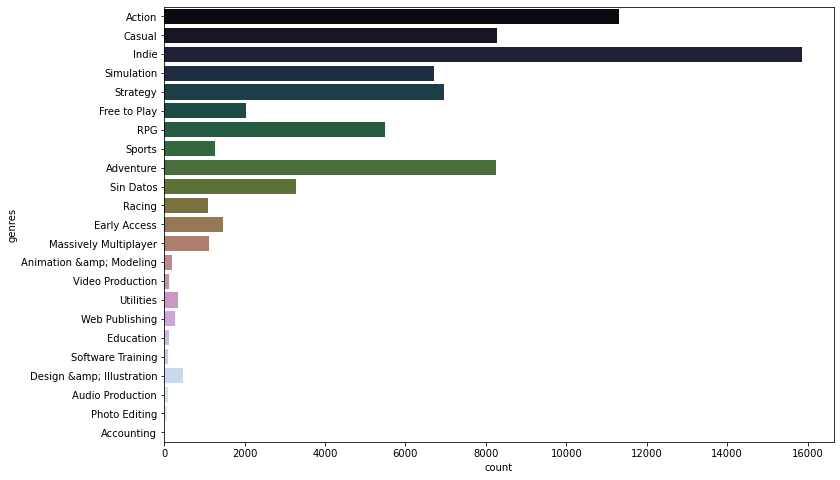

In [20]:
plt.figure(figsize=(12, 8))
sns.countplot(data=games_2, y='genres', orient='h', palette=("cubehelix"))
plt.show()

Obs: Sin distinguir tipos de juegos, año de lanzamiento, review entre otros, en total el genero que más se repite es Indie, seguido por action

4.2 Año de lanzamiento

In [22]:
cantidad_juegos_anios= games_2["Año de lanzamiento"].value_counts()
cantidad_juegos_anios #en el 2017 fue el año con más juegos y hay un caso 5275 que seguramente es dato mal cargado o error de parte nuestra

2017    25509
2016    17935
2015    12423
2014     6471
2013     3091
0        2386
2012     2161
2011     1035
2010      706
2009      513
2018      503
2008      351
2007      277
2006      230
2005      149
2003      128
2001      119
2004      107
1999       87
1998       86
2002       70
1997       67
1996       60
2000       60
1994       56
1995       51
1993       49
1992       26
1991       26
1990       16
1989       14
2019       13
1988       11
1987       10
1984        7
1983        6
1986        5
1985        3
1982        3
1981        3
2021        3
5275        3
1970        2
1975        1
1980        1
Name: Año de lanzamiento, dtype: int64

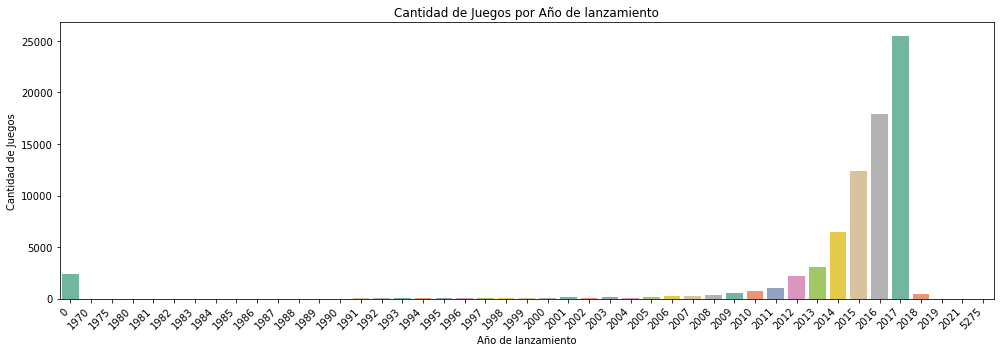

In [25]:
cantidad_juegos_anios= cantidad_juegos_anios.sort_index()

plt.figure(figsize=(14, 5))

sns.barplot(x=cantidad_juegos_anios.index, y=cantidad_juegos_anios.values, palette=("Set2"))
plt.xlabel('Año de lanzamiento') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Cantidad de Juegos por Año de lanzamiento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Obs: los 0 y 5275 son outliers, no se consideran. A partir del año 2011 se podria decir que empezo a crecer de una manera exponecial la cantidad de juegos en la plataforma


4.3 ID

In [23]:
cantidad_juegos= len(games_2["item_id"].unique())
cantidad_juegos # contiene 32.132 id/juegos unicos

32132

4.4 Price

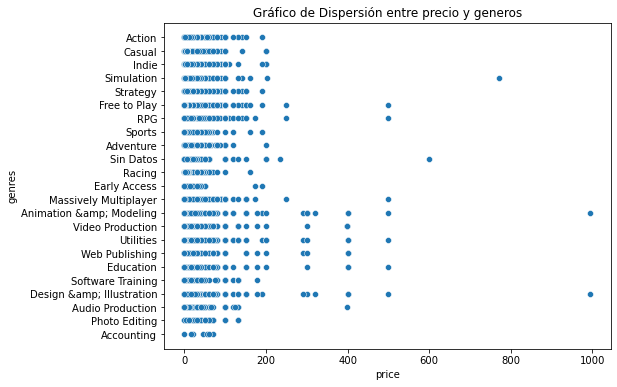

In [26]:
# Crear un gráfico de dispersión 
plt.figure(figsize=(8, 6))
sns.scatterplot(data=games_2, x='price', y='genres')
plt.title('Gráfico de Dispersión entre precio y generos')
plt.xlabel('price')
plt.ylabel('genres')
plt.show()

In [34]:
games_2["price"].value_counts()

4.99      9893
9.99      9010
0.00      8467
2.99      7834
0.99      6319
          ... 
2.89         1
99.00        1
599.00       1
8.98         1
9.00         1
Name: price, Length: 145, dtype: int64

In [49]:
#puedo armar el top de juegos mas caros
games_price= games_2[["item_id","app_name","price"]] #dejo las columnas que necesito, porque quiero ver el item_id unico
games_price= games_price.drop_duplicates()
games_price.sort_values(by = ['price'], inplace=True,ascending=False)
games_price.head(10)

,item_id,app_name,price
27997,719000,Strata Spaces VR – Professional Edition Upgrade,995.00
4462,292180,X-Plane 10 Global - 64 Bit,771.71
55936,358040,HTC Vive,599.00
42064,629796,EVE Online: 15400 PLEX,499.99
33548,691560,CUR3D Maker Edition - Permission for commercia...,499.99
20623,585620,GameMaker Studio 2 Mobile,399.99
20630,585610,GameMaker Studio 2 UWP,399.99
37376,689790,VEGAS Pro 15 Edit Steam Edition,399.00
32140,750840,MAGIX Video Pro X9 Steam Edition,399.00
21401,598860,MAGIX Video Pro X8 Steam Edition,399.00


Obs: Los juegos mas caros, no se encuentran dentro de los mas generos más repetidos. El rango de precio más concetrado se encuentra entre 0 a 200 usd.

4.5 Developer

In [51]:
developer= games_2["developer"].value_counts()
developer

Sin Datos                              3478
Ubisoft - San Francisco                2516
SmiteWorks USA, LLC                    2364
DL Softworks                            495
Ronimo Games                            379
                                       ... 
A-Flight,Caipirinha Games                 1
Grip Digital,Terrible Posture Games       1
Anatola Howard,Duncan Cross               1
Simtech Vision                            1
PIPE Studio                               1
Name: developer, Length: 10993, dtype: int64

Text(0.5, 1.0, 'Top 10 Developers')

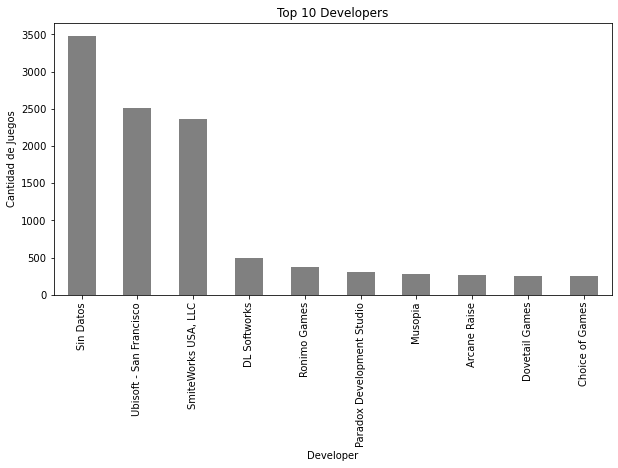

In [63]:
plt.figure(figsize=(10, 5))
developer[:10].plot(kind='bar', color='gray')
plt.xlabel('Developer') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Developers')

Obs:El mayor desarrollar es ubisoft, que tiene juegos como assassin's creed, mario rabbids, just dance

4.6. Developer

In [64]:
publisher= games_2["publisher"].value_counts()
publisher

Sin Datos                 15615
KISS ltd                    807
Ubisoft                     686
Degica                      536
Paradox Interactive         443
                          ...  
Itsjusta Games                1
Bit Blot, LLC                 1
Henri Osbourne                1
Nostalgia Addict Games        1
いくちおすてご                       1
Name: publisher, Length: 8238, dtype: int64

Text(0.5, 1.0, 'Top 10 Publishers')

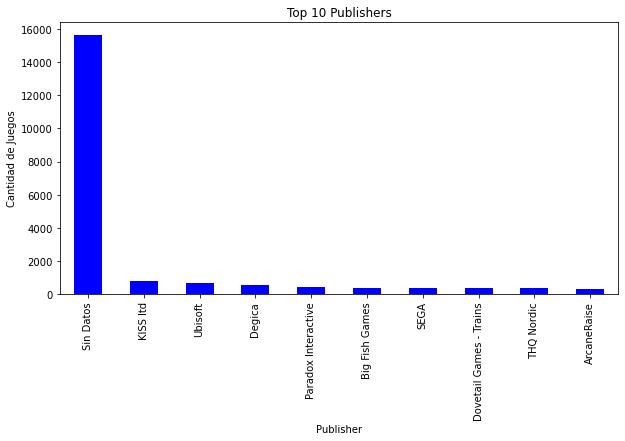

In [68]:
plt.figure(figsize=(10, 5))
publisher[:10].plot(kind='bar', color='blue')
plt.xlabel('Publisher') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Publishers')

Obs: Kiss es una editora de juegos, que han publica indie games

### EDA de user_reviews

1. Extracción de datos

In [69]:
user_re_1= pd.read_csv('data/reviews_9.csv', encoding='utf8')
user_re_1.head(2)

,user_id,item_id,helpful,recommend,year,sentiment_analisis,polaridad
0,76561197970982479,1250,No ratings yet,True,2011,1,0.174444
1,76561197970982479,22200,No ratings yet,True,2011,2,0.337500


2. Revision nulos

In [70]:
user_re_1.isnull().sum()

user_id               0
item_id               0
helpful               0
recommend             0
year                  0
sentiment_analisis    0
polaridad             0
dtype: int64

3. Revision de variables
- **user_id** : identificación del usuario de plataforma
- **recommend** : valor booleano que indica si se ha realizado review
- **sentiment_analisis** : clasificación de las reviews en:

    - positivo = 2 
    - negativo = 0 
    - neutral = 1

3.1 User

In [72]:
cantidad_user_reviews= len(user_re_1["user_id"].unique())
cantidad_user_reviews #hay 25.467 usuarios registrados

25467

3.2 Recommend 

In [73]:
cant_recomendacion= user_re_1["recommend"].value_counts()
cant_recomendacion #esta variable se usa en las funciones para calcular la cantidad de recomendaciones por genero

True     52473
False     6832
Name: recommend, dtype: int64

3.3 Análisis de sentimientos

In [74]:
cant_sent= user_re_1["sentiment_analisis"].value_counts()
cant_sent #la funcion de polaridad, tiene la particularidad de no ser muy exacto, por lo cual en funcion de ciertas palabras claves
#se define la polaridad.

1    40269
2    15349
0     3687
Name: sentiment_analisis, dtype: int64

### EDA de user_items

1. Extracción de datos

In [75]:
user_item_1= pd.read_csv('data/items_3.csv', encoding='utf8')
user_item_1.head(2)

,item_id,item_name,playtime_forever,user_id,steam_id,items_count
0,10,Counter-Strike,6,76561197970982479,76561197970982479,277
1,20,Team Fortress Classic,0,76561197970982479,76561197970982479,277


2. Revision de nulos

In [76]:
user_item_1.isnull().sum()

item_id             0
item_name           0
playtime_forever    0
user_id             0
steam_id            0
items_count         0
dtype: int64

3. Revision de variables

In [77]:
user_item_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           int64 
 1   item_name         object
 2   playtime_forever  int64 
 3   user_id           object
 4   steam_id          int64 
 5   items_count       int64 
dtypes: int64(4), object(2)
memory usage: 235.9+ MB


3.1 item_name

In [80]:
#conteo por titulo 
juego = user_item_1["item_name"].value_counts()
juego # el juego mas repetido es dota 2 test, esto puede ser la cantidad de usuarios que juegan, o comentan

Dota 2 Test                            49571
Counter-Strike: Global Offensive       43776
Garry's Mod                            43301
Unturned                               38682
Left 4 Dead 2                          37044
                                       ...  
My Own Pet                                 1
Medieval Battlefields Black Edition        1
Football VR                                1
Tower Dwellers                             1
Arachnophobia                              1
Name: item_name, Length: 10947, dtype: int64

In [79]:
cant_juegos= len(user_item_1["item_name"].unique())
cant_juegos # en steam hay 10.947 juegos

10947

3.2 items_count

In [82]:
# Agrupa por usuario la cantidad de items, lo conviente en data frame y los ordena de mayor a menor
items_count = user_item_1.groupby('user_id')['items_count'].unique()
items_count= pd.DataFrame(items_count)
items_count_user = items_count.sort_values('items_count', ascending=False)
items_count_user # no se que tan consistente es decir que un usuario juega cerca de 7762 juegos, por lo pronto descarto la variable

,items_count
user_id,
phrostb,[7762]
thugnificent,[6700]
chidvd,[6410]
piepai,[6132]
mayshowganmore,[5027]
...,...
76561198092978311,[1]
76561198092984441,[1]
76561198092985047,[1]


3.3 playtime_forever

In [83]:
time_count = user_item_1.groupby('user_id')['playtime_forever'].unique().explode()
time_count= pd.DataFrame(time_count)
time_count_user = time_count.sort_values('playtime_forever', ascending=False)
time_count_user

,playtime_forever
user_id,
wolop,642773
Evilutional,635295
76561198019826668,632452
76561198039832932,613411
tsunamitad,600068
...,...
76561198031798372,0
Cjixeres,0
76561198085797241,0


En teoria playtime_forever es minutos, con lo cual wolop aproximadamente jugo 442 dias seguidos, 24 hs para tener un aproximado, y le sigue evilutional con 441 dias.

Tras analizar las variables de todas las tablas, se considera solamente usar el genero para el sistema de recomendación, con lo cual se procede a unificar solamente las tablas y variables necesarias para ello, para una mayor optimización de la api.

In [84]:
modelo_item= games_2[["item_id", "app_name", "genres"]]

In [85]:
modelo_item_csv = "data/modelo_item.csv"
modelo_item.to_csv(modelo_item_csv , index=False, encoding="utf-8")